<a href="https://colab.research.google.com/github/premswaroopmusti/Image-classification-using-CNN/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(x_train,y_train), (x_test,y_test) =  datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

training samples is 50,000

each sample is 32 by 32 image

and 3 is for rgb channels

In [16]:
  x_test.shape

(10000, 32, 32, 3)

In [17]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

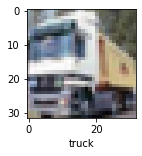

In [20]:
plot_sample(x_train,y_train,1)

In [21]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

u see the value above are 184, 216 and so on

In [22]:
# lets normalize our data
# whenever we have an image we divide each pixel value by 255 bcz the pixel value ranges from 0 to 255 for each of the channels r,g,b
# and if u divide it by 255 u will be normalizing it into 0 to 1 range.
x_train = x_train/255
x_test = x_test/255

In [23]:
# we will build a simple artificial neural network first to train the model
# let's see the performance of how artificial neural network works and then we will do convolutional neural network 

In [24]:
ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32,3)),
                         layers.Dense(3000, activation = 'relu'),
                         layers.Dense(3000, activation = 'relu'),
                         layers.Dense(10, activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 209s 133ms/step - loss: 1.8068 - accuracy: 0.3566
Epoch 2/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.6192 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.5375 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.4785 - accuracy: 0.4800
Epoch 5/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.4260 - accuracy: 0.4971


In [25]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 11s 35ms/step - loss: 1.4844 - accuracy: 0.4732


[1.4844098091125488, 0.4731999933719635]

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.25      0.38      1000
           1       0.64      0.58      0.61      1000
           2       0.31      0.49      0.38      1000
           3       0.32      0.41      0.36      1000
           4       0.48      0.30      0.37      1000
           5       0.34      0.45      0.39      1000
           6       0.57      0.49      0.52      1000
           7       0.54      0.59      0.56      1000
           8       0.55      0.68      0.61      1000
           9       0.62      0.49      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



best thing about convolutional neural network is don't need to tell it what the filters are, it will figure out the filters for u

u only need to tell the filter size and how many filters do u wnat

In [32]:
# now we are going to use CNN to imporve the performance of the model
# so CNN have couple of layers , so that layers would be convolutional layer and then relu, and then pooling and then again convolutional then again relu and pooling and then u
# have a dense network. so we will keep the dense netowrk, but on the front of dense network we will add some convolution and pooling layer
cnn = models.Sequential([
     # we will have some CNN layers here
     layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
     layers.MaxPooling2D((2,2)),

     layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
     layers.MaxPooling2D((2,2)),
     # and this will be ur dense network
    layers.Flatten(),# when u r in the middle layer u don't need to specify the input shape, bcz the network will figure it out automatically
    layers.Dense(64, activation = 'relu'), # i am going to keep only one dense network, bcz cnn would have done most of the work,so we dont need so many neurons and so many deep layers 
    layers.Dense(10, activation = 'softmax') # softmax will normalize ur probability in a range between 0 and 1                   
])

In [33]:
cnn.compile(optimizer =  'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [34]:
cnn.fit(x_train,y_train,epochs = 30)

Epoch 1/30
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4840 - accuracy: 0.4669
Epoch 2/30
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1126 - accuracy: 0.6104
Epoch 3/30
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9746 - accuracy: 0.6603
Epoch 4/30
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8946 - accuracy: 0.6897
Epoch 5/30
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8228 - accuracy: 0.7154
Epoch 6/30
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7720 - accuracy: 0.7325
Epoch 7/30
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7227 - accuracy: 0.7484
Epoch 8/30
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6857 - accuracy: 0.7622
Epoch 9/30
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6518 - accuracy: 0.7749
Epoch 10/30
1563/1563 [==============================] - 65s 42m

In [35]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.6223 - accuracy: 0.6795


[1.6223431825637817, 0.6794999837875366]

In [38]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

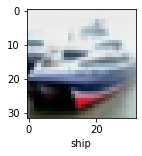

In [46]:
plot_sample(x_test,y_test,1)

In [50]:
y_pred = cnn.predict(x_test)
y_pred[:5]


array([[1.1969111e-06, 1.5506796e-10, 3.3104650e-04, 9.9081892e-01,
        2.3050050e-05, 8.5523874e-03, 2.7313613e-04, 4.4133374e-11,
        3.9785797e-07, 9.2109133e-11],
       [5.3723883e-02, 7.2680012e-04, 9.3072723e-11, 5.8842139e-11,
        9.0269572e-15, 9.1216216e-13, 1.7986033e-15, 7.8596923e-19,
        9.4472551e-01, 8.2382775e-04],
       [9.5288366e-02, 5.3230566e-03, 4.3796271e-04, 1.1422582e-03,
        5.7290581e-05, 4.0845239e-06, 1.7475116e-04, 9.0435706e-03,
        8.6351001e-01, 2.5018657e-02],
       [9.9999678e-01, 4.3775530e-09, 3.1916991e-06, 2.2252904e-11,
        6.4772211e-13, 3.3588495e-14, 2.8813960e-13, 3.3831882e-09,
        2.3482770e-08, 5.5479118e-11],
       [5.2382045e-08, 1.9990628e-07, 1.5218597e-03, 4.2656828e-02,
        1.3694197e-01, 7.7302298e-05, 8.1880182e-01, 2.0197007e-15,
        1.0527603e-07, 6.0237644e-13]], dtype=float32)

In [54]:
# np.argmax will return the index of the value
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [55]:
print('classification report: \n', classification_report(y_test,y_classes))


classification report: 
               precision    recall  f1-score   support

           0       0.66      0.78      0.72      1000
           1       0.75      0.86      0.80      1000
           2       0.49      0.66      0.56      1000
           3       0.55      0.45      0.49      1000
           4       0.67      0.59      0.62      1000
           5       0.63      0.55      0.59      1000
           6       0.69      0.79      0.73      1000
           7       0.77      0.68      0.72      1000
           8       0.86      0.71      0.78      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

